# MATH 210 Introduction to Mathematical Computing

**March 20, 2024**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

## Van der Pol Equation

Compute numerical solutions of the Van der Pol equation

$$
x'' - \mu(1 - x^2)x' + x = 0
$$

for different values $\mu > 0$.

Let $u_0 = x$ and $u_1 = x'$ and write

\begin{align*}
u_0' &= u_1 \\
u_1' &= \mu (1 - u_0^2)u_1 - u_0
\end{align*}

In [2]:
mu = 5
f = lambda u,t: np.array([ u[1] , mu*(1 - u[0]**2)*u[1] - u[0] ])
t0 = 0; tf = 20; N = 1000;
t = np.linspace(t0,tf,N+1)
u0 = [0,1]

u = spi.odeint(f,u0,t)

In [3]:
type(u)

numpy.ndarray

In [4]:
u.shape

(1001, 2)

Plot $x(t)$ versus $t$:

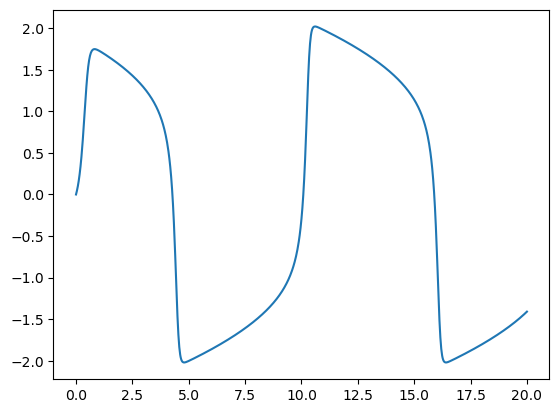

In [5]:
plt.plot(t,u[:,0])
plt.show()

## 2D Mass Spring System

In [6]:
k = 1; L = 1; m = 1;

def f(u,t):
    dudt = np.zeros(4)
    dudt[0] = u[1]
    dudt[1] = 1/m*(k*L*u[0]/np.sqrt(u[0]**2 + u[2]**2) - k*u[0])
    dudt[2] = u[3]
    dudt[3] = 1/m*(k*L*u[2]/np.sqrt(u[0]**2 + u[2]**2) - k*u[2])
    return dudt

In [7]:
def f(u,t):
    k = 1; L = 1; m = 1;
    dudt0 = u[1]
    dudt1 = 1/m*(k*L*u[0]/np.sqrt(u[0]**2 + u[2]**2) - k*u[0])
    dudt2 = u[3]
    dudt3 = 1/m*(k*L*u[2]/np.sqrt(u[0]**2 + u[2]**2) - k*u[2])
    dudt = np.array([dudt0,dudt1,dudt2,dudt3])
    return dudt

Plot trajectories!

In [8]:
t0 = 0; tf = 50; N = 2000;
t = np.linspace(t0,tf,N+1)
u0 = [1,0,0,2]
u = spi.odeint(f,u0,t)

In [12]:
u[:5,:].round(2)

array([[ 1.  ,  0.  ,  0.  ,  2.  ],
       [ 1.  , -0.  ,  0.05,  2.  ],
       [ 1.  , -0.  ,  0.1 ,  2.  ],
       [ 1.  , -0.  ,  0.15,  2.  ],
       [ 1.  , -0.  ,  0.2 ,  2.  ]])

In [13]:
u.shape

(2001, 4)

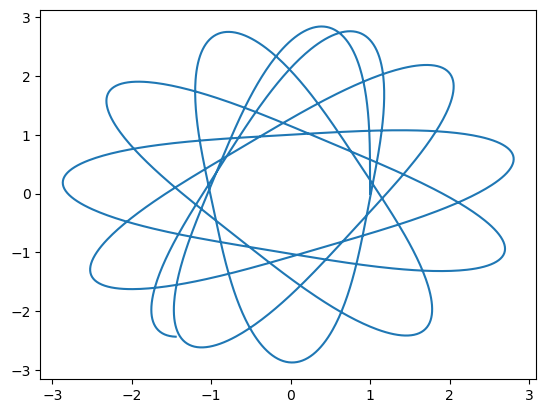

In [14]:
plt.plot(u[:,0],u[:,2])
plt.show()

## Euler's 3-Body Problem

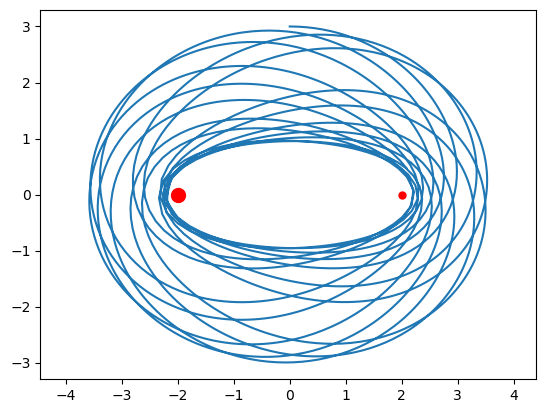

In [15]:
G = 4*np.pi**2 # Gravitational constant
S1 = [-2,0] # Coordinates of Star 1
S2 = [2,0] # Coordinates of Star 2
M1 = 2 # Mass of Star 1 (in solar mass)
M2 = 1 # Mass of Star 2 (in solar mass)

def f(u,t):
    d1 = np.linalg.norm([u[0] - S1[0],u[2] - S1[1]])
    d2 = np.linalg.norm([u[0] - S2[0],u[2] - S2[1]])
    dudt = [0,0,0,0]
    dudt[0] = u[1]
    dudt[1] = -G*M1*(u[0] - S1[0])/d1**3 - G*M2*(u[0] - S2[0])/d2**3
    dudt[2] = u[3]
    dudt[3] = -G*M1*(u[2] - S1[1])/d1**3 - G*M2*(u[2] - S2[1])/d2**3
    return dudt

u0 = [0,5,3,0] # Initial conditions of the planet: [xposition,xvelocity,yposition,yvelocity]
t = np.linspace(0,30,2000) # Array of time values (in years)
u = spi.odeint(f,u0,t) # Solve system: u = [xposition,xvelocity,yposition,yvelocity]

plt.plot(u[:,0],u[:,2]) # Plot trajectory of the planet
plt.plot(S1[0],S1[1],'ro',markersize=5*M1) # Plot Star 1 as a red star
plt.plot(S2[0],S2[1],'ro',markersize=5*M2) # Plot Star 2 as a red star
plt.axis('equal')
plt.show()